<a href="https://colab.research.google.com/github/rakeshhero101/AppleSharePricePrediction/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Description: This program uses AI recurrent neural network called long short term memory (LSTM) to predict the closing stock price of corporation (Apple INC.)
# Using the past 60 day stock price.

In [2]:
# Import the libraries
import math 
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-11-17')

#show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.566676
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.634213
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.774481
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.908023
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,12.887549
...,...,...,...,...,...,...
2020-11-11,119.629997,116.440002,117.190002,119.489998,112295000.0,119.489998
2020-11-12,120.529999,118.570000,119.620003,119.209999,103162300.0,119.209999
2020-11-13,119.669998,117.870003,119.440002,119.260002,81581900.0,119.260002


In [4]:
# Get the number of rows and columns in the dataset
df.shape

(2235, 6)

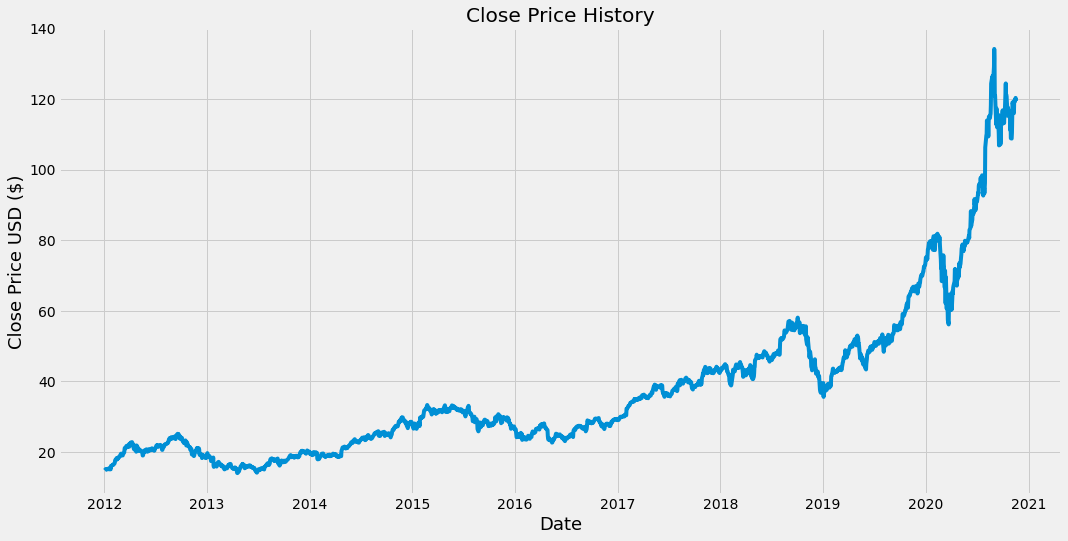

In [5]:
# visualize the closing price history 
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
# Create new DF with only the close column
data = df.filter(['Close'])

# convert the DF to an numpy array
dataset = data.values

#Get the number of rows to train the model on

training_data_len = math.ceil(len(dataset) * .8)

training_data_len


1788

In [7]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.0061488 ],
       [0.00680527],
       [0.00816869],
       ...,
       [0.87590717],
       [0.88455708],
       [0.87698838]])

In [8]:
# Create the training dataset
# create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]

#split the data into x_train and y_train dataset
x_train = []
y_train = []

for i in range (60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if(i <= 61):
    print(x_train)
    print(y_train)
    print()

[array([0.0061488 , 0.00680527, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869744, 0.01014998,
       0.01145994, 0.01105596, 0.00884299, 0.01095496, 0.00887566,
       0.01667305, 0.01607005, 0.01685722, 0.01855928, 0.01959001,
       0.01950387, 0.01918604, 0.02054056, 0.02181487, 0.02325851,
       0.0255903 , 0.03048855, 0.03056281, 0.03328967, 0.03532738,
       0.03182524, 0.03317382, 0.03314709, 0.03692846, 0.0363908 ,
       0.03738589, 0.0391741 , 0.0401692 , 0.04303567, 0.04512389,
       0.04572687, 0.04593778, 0.04236733, 0.04150589, 0.04163362,
       0.04499021, 0.04593482, 0.04796361, 0.05274602, 0.05912652,
       0.0579324 , 0.05793537, 0.06254846, 0.06399208, 0.06296431,
       0.06202567, 0.06104839, 0.06429507, 0.06652291, 0.06745562])]
[0.06515055661523342]

[array([0.0061488 , 0.00680527, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869744, 0.01014998,
       0.01145994, 0.01105596, 0.00

In [9]:
# convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1728, 60, 1)

In [11]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
1728/1728 [==============================] - 39s 23ms/step - loss: 2.6101e-04
Epoch 2/5
1728/1728 [==============================] - 37s 22ms/step - loss: 1.1592e-04
Epoch 3/5
1728/1728 [==============================] - 37s 21ms/step - loss: 8.5119e-05
Epoch 4/5
1728/1728 [==============================] - 36s 21ms/step - loss: 6.8694e-05
Epoch 5/5
1728/1728 [==============================] - 37s 21ms/step - loss: 7.2517e-05


In [14]:
# Create the testing dataset
# Create new array containing scaled values from index 1543 to 2003

test_data = scaled_data[training_data_len - 60:, :]

#create the datasets x_test, y_test
x_test = []
y_test = dataset[training_data_len:, :]
 
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [15]:
# convert the data to a numpy array 
x_test = np.array(x_test)

In [16]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [18]:
# Evaluate our model, Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.258895933761426

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


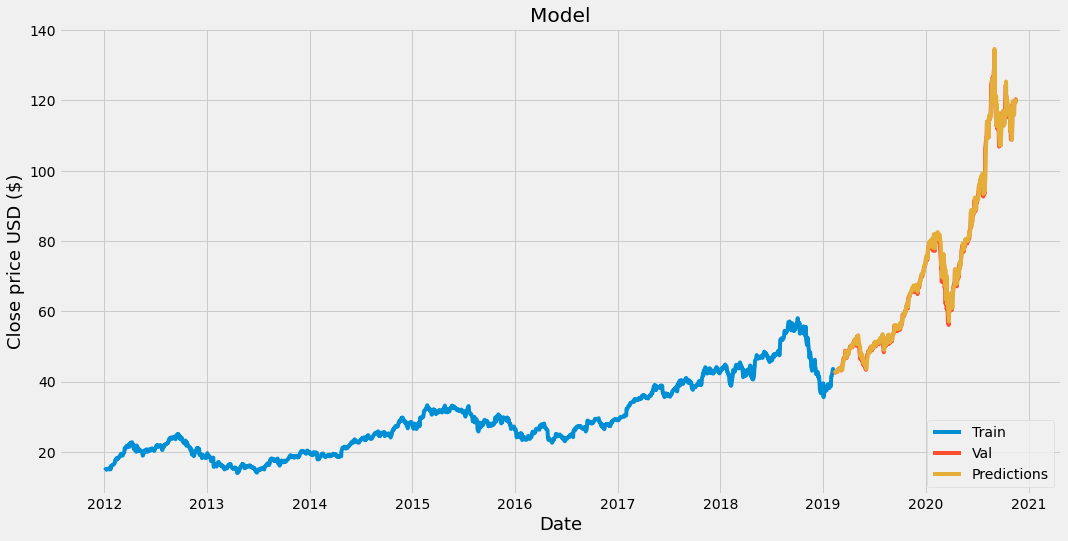

In [19]:
# Plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [20]:
# show the valid and prdicted prices
valid

,Close,Predictions
Date,,
2019-02-12,42.722500,42.405899
2019-02-13,42.544998,42.748306
2019-02-14,42.700001,42.670044
2019-02-15,42.605000,42.792637
2019-02-19,42.732498,42.725586
...,...,...
2020-11-11,119.489998,115.887863
2020-11-12,119.209999,119.950829
2020-11-13,119.260002,119.321259


In [22]:
# Get the quote

apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-11-19')

#create a new DF
new_df = apple_quote.filter(['Close'])

#Get the last 60 days closing price values and convert the df to an array
last_60_days = new_df[-60:].values

#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#create an empty list
X_test = []

#Append the past 60 days
X_test.append(last_60_days_scaled)

#convert the X_test data set to an numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Get the predicted scaled price
pred_price = model.predict(X_test)

# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)



[[118.084206]]


In [23]:
# Get the quote

apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-11-19', end='2020-11-19')
print(apple_quote2['Close'])

Date
2020-11-18    118.029999
Name: Close, dtype: float64
